# ANALYSIS OF FORBES BILLIONAIRES:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [ ]:
df = pd.read_csv('forbes_billionaires.csv')
df.head(10)

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",True
6,Larry Ellison,93.0,United States,software,7,76.0,"Lanai, Hawaii",United States,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",True
7,Larry Page,91.5,United States,Google,8,48.0,"Palo Alto, California",United States,Married,1.0,"Master of Science, Stanford University; Bachel...",True
8,Sergey Brin,89.0,United States,Google,9,47.0,"Los Altos, California",United States,Married,3.0,"Master of Science, Stanford University; Bachel...",True
9,Mukesh Ambani,84.5,India,diversified,10,64.0,"Mumbai, India",India,Married,3.0,"Drop Out, Stanford University; Bachelor of Sci...",False


In [ ]:
df.describe()

,NetWorth,Rank,Age,Children
count,2755.000000,2755.000000,2630.00000,1552.000000
mean,4.749220,1345.663521,63.26730,2.978093
std,9.615358,772.669811,13.47916,1.618569
min,1.000000,1.000000,18.00000,1.000000
25%,1.500000,680.000000,54.00000,2.000000
50%,2.300000,1362.000000,63.00000,3.000000
75%,4.200000,2035.000000,73.00000,4.000000
max,177.000000,2674.000000,99.00000,23.000000


## 1. Which sector has the most number of billionaires?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


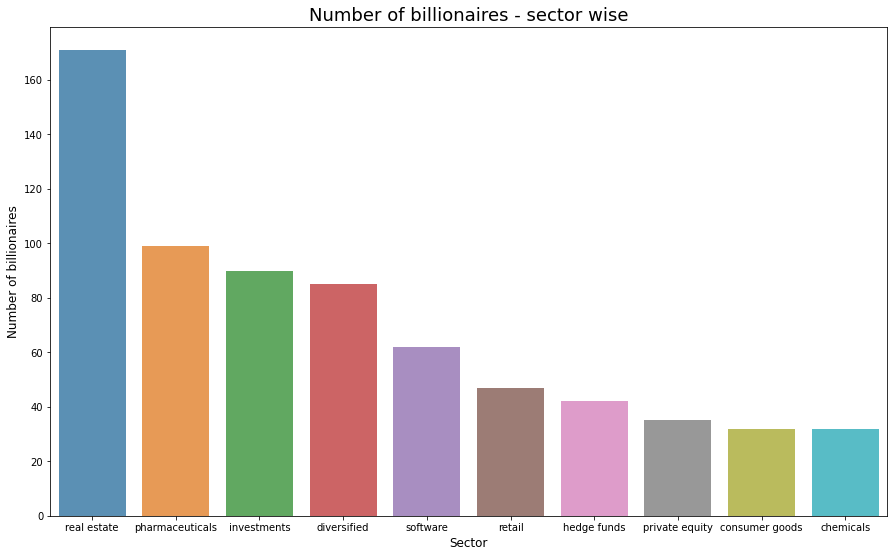

In [ ]:
source = df['Source'].value_counts().head(10)
plt.figure(figsize=(15,9))
sns.barplot(source.index, source.values, alpha=0.8)
plt.title('Number of billionaires - sector wise', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('Sector', fontsize=12)
plt.show()

## 2. Relationship between net-worth and number of children

In [ ]:
df[['NetWorth','Children']].corr()

,NetWorth,Children
NetWorth,1.000000,0.053064
Children,0.053064,1.000000


In [ ]:
df['NetWorth'].corr(df['Children'])

0.053064135762234274

## 3. Does a college degree required to become a billionaire?

In [ ]:
df['Education'] = df['Education'].fillna('empty')
master = 0
bachelor = 0
phd = 0
drop_out = 0
others = 0
unknown = 0
for i in df['Education']:
  if 'Ph.D' in i or 'Doctorate' in i:
    phd += 1
  elif 'Master' in i or 'MBA' in i:
    master += 1
  elif 'Bachelor' in i:
    bachelor += 1
  elif 'Drop Out' in i:
    drop_out += 1
  elif i == 'empty':
    unknown += 1
  else:
    others += 1

bachelor_percent = bachelor/(bachelor+master+phd+drop_out+others)*100
master_percent = master/(bachelor+master+phd+drop_out+others)*100
phd_percent = phd/(bachelor+master+phd+drop_out+others)*100
dropout_percent = drop_out/(bachelor+master+phd+drop_out+others)*100
others_percent = others/(bachelor+master+phd+drop_out+others)*100

print(f'Around {round(bachelor_percent)}% of the billionaires have only done bachelors degree')
print(f'Around {round(master_percent)}% of the billionaires have done masters degree')
print(f'Around {round(phd_percent)}% of the billionaires have done PHD degree')
print(f'Around {round(dropout_percent)}% of the billionaires have dropped out of the college')


Around 47% of the billionaires have only done bachelors degree
Around 33% of the billionaires have done masters degree
Around 7% of the billionaires have done PHD degree
Around 5% of the billionaires have dropped out of the college


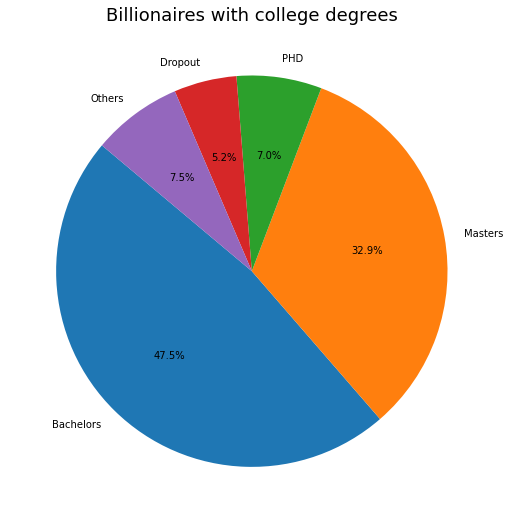

In [ ]:
labels = ['Bachelors', 'Masters', 'PHD', 'Dropout', 'Others']
sizes = [bachelor_percent, master_percent, phd_percent, dropout_percent, others_percent]
plt.figure(figsize=(15,9))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',startangle=140)
plt.title('Billionaires with college degrees', fontsize=18)
plt.show()

## 4. Where to study to become a billionaire?

In [ ]:
final_bachelor = {}
final_master = {}
for i in df['Education']:
  j = i.split(';')
  if len(j) == 1 and 'Bachelor' in j[0]:
    new = j[0].split(',')
    if new[-1] in final_bachelor:
      final_bachelor[new[-1]] += 1
    else:
      final_bachelor[new[-1]] = 1
  elif len(j) == 2 and 'Master' in j[0]:
    new = j[0].split(',')
    if new[-1] in final_master:
      final_master[new[-1]] += 1
    else:
      final_master[new[-1]] = 1
  elif len(j) == 2 and 'Master' in j[1]:
    new = j[1].split(',')
    if new[-1] in final_master:
      final_master[new[-1]] += 1
    else:
      final_master[new[-1]] = 1

sort_bachelor = dict(sorted(final_bachelor.items(),key=lambda x:x[1],reverse = True)[:10])
sort_master = dict(sorted(final_master.items(),key=lambda x:x[1],reverse = True)[:10])
print('No. of billionaires who have done Bachelors at:', sort_bachelor)
print('No. of billionaires who have done Masters at:', sort_master)

No. of billionaires who have done Bachelors at: {' Stanford University': 18, ' Harvard University': 13, ' The Wharton School': 9, ' Yale University': 9, ' University of Southern California': 9, ' Bombay University': 7, ' University of Washington': 6, ' Delhi University': 6, ' Cornell University': 6, ' Sichuan University': 5}
No. of billionaires who have done Masters at: {' Harvard Business School': 22, ' Harvard University': 22, ' Stanford Graduate School of Business': 16, ' Stanford University': 13, ' Columbia Business School': 11, ' The Wharton School': 8, ' Massachusetts Institute of Technology': 7, ' Columbia University': 6, ' Leonard N. Stern School of Business': 6, ' Tsinghua University': 4}


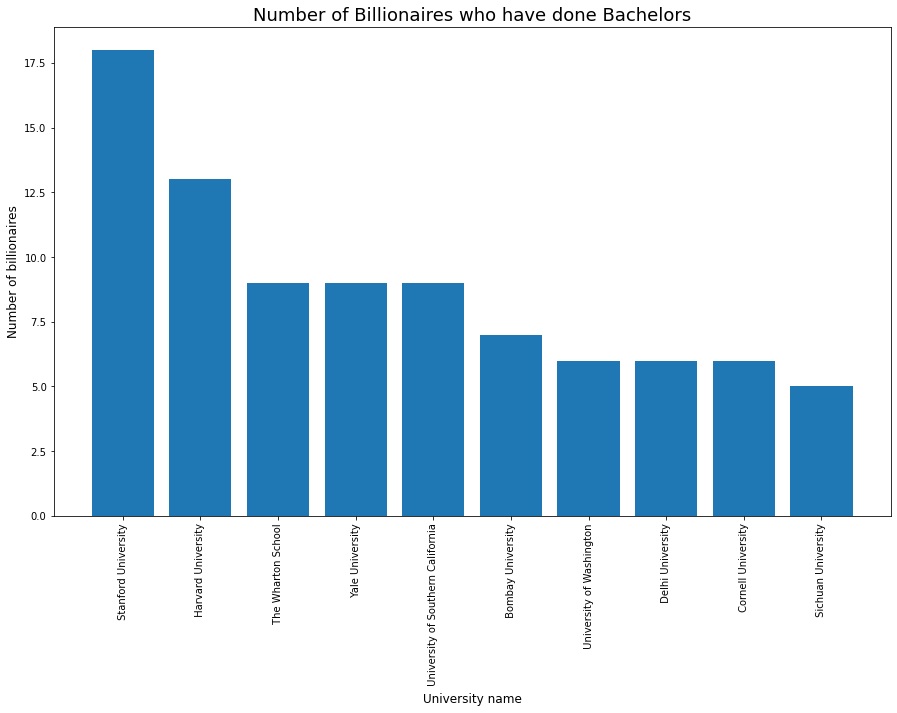

In [ ]:
plt.figure(figsize=(15,9))
plt.bar(*zip(*sort_bachelor.items()))
plt.title('Number of Billionaires who have done Bachelors', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('University name', fontsize=12)
plt.xticks(rotation=90)
plt.show()

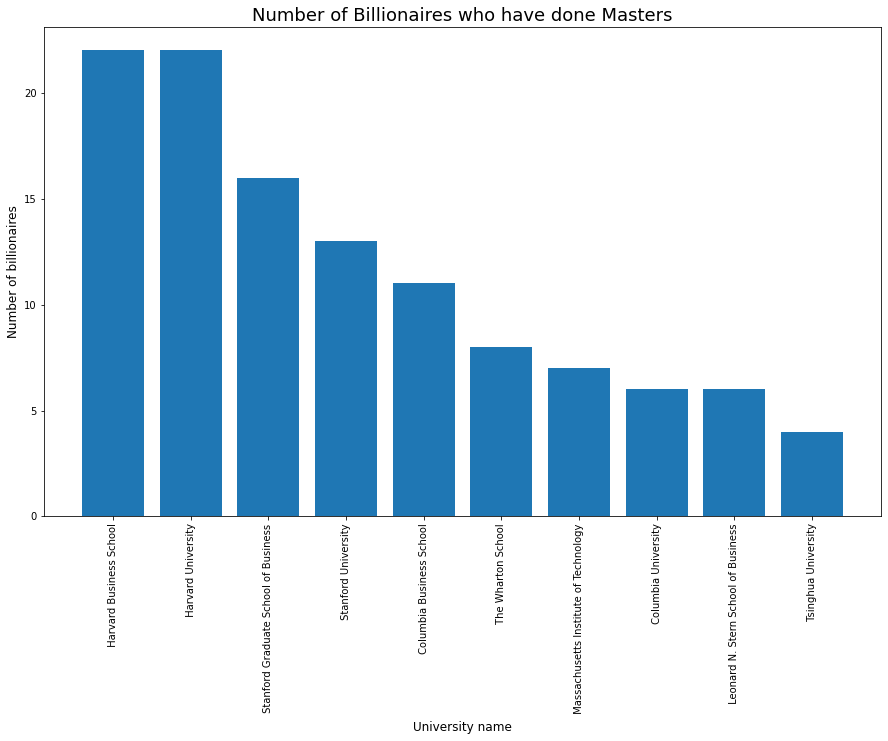

In [ ]:
plt.figure(figsize=(15,9))
plt.bar(*zip(*sort_master.items()))
plt.title('Number of Billionaires who have done Masters', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('University name', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## 5. Number of Billionaries - Age wise:

In [ ]:
age = {'n0s':0, '10s':0, '20s':0, '30s':0, '40s':0, '50s':0, '60s':0, '70s':0, '80s':0, '90s':0, 'above':0}
for i in df['Age']:
  age[str(i)[0] + '0s'] += 1

for k,v in age.items():
  if k == 'n0s' or k == 'above':
    pass
  else:
    print(f'Number of billionaires who are in their {k}:',v)

Number of billionaires who are in their 10s: 1
Number of billionaires who are in their 20s: 9
Number of billionaires who are in their 30s: 94
Number of billionaires who are in their 40s: 291
Number of billionaires who are in their 50s: 729
Number of billionaires who are in their 60s: 631
Number of billionaires who are in their 70s: 547
Number of billionaires who are in their 80s: 258
Number of billionaires who are in their 90s: 70


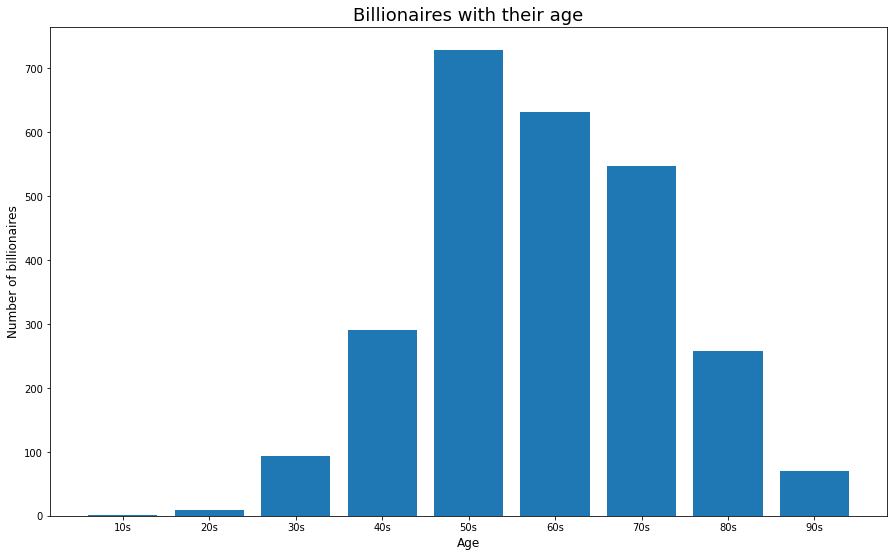

In [ ]:
age1 = age
del age1['n0s']
del age1['above']

plt.figure(figsize=(15,9))
plt.bar(*zip(*age1.items()))
plt.title('Billionaires with their age', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

## 6. Number of Self made billionaries:

In [ ]:
print("Number of billionaires who are self made: ",df['Self_made'].sum())
print("Number of billionaires who are not self made: ",len(df['Self_made']) - df['Self_made'].sum())

Number of billionaires who are self made:  1960
Number of billionaires who are not self made:  795


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


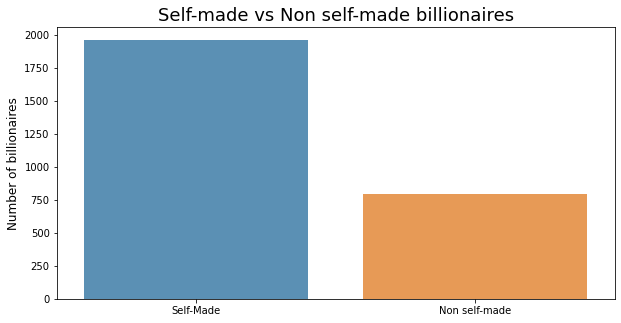

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(['Self-Made', 'Non self-made'], [df['Self_made'].sum(),len(df['Self_made']) - df['Self_made'].sum()], alpha=0.8)
plt.title('Self-made vs Non self-made billionaires', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.show()

## 7. Where do younger billionaires live?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


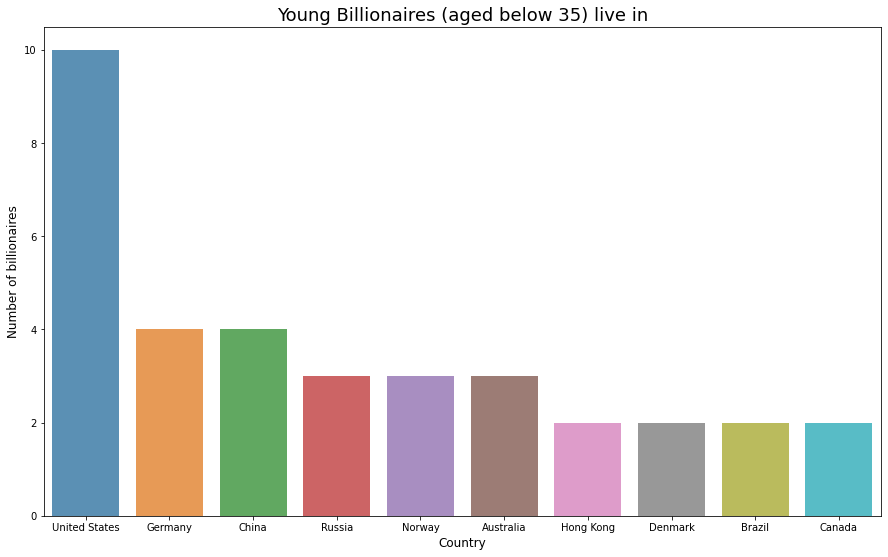

In [ ]:
df1 = df[df['Age']<=35]
young = df1['Country'].value_counts().head(10)
plt.figure(figsize=(15,9))
sns.barplot(young.index, young.values, alpha=0.8)
plt.title('Young Billionaires (aged below 35) live in', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

## 8. Number of billionaires in each relationship category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


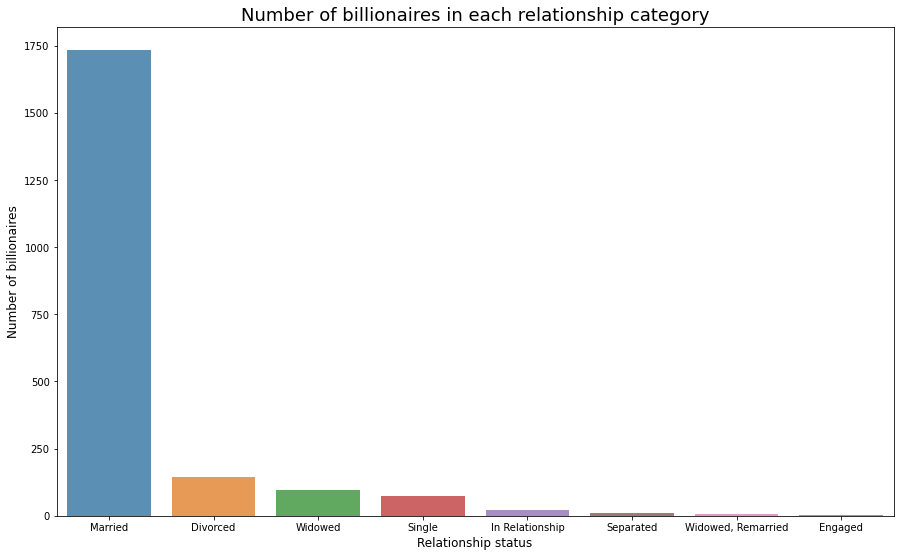

In [ ]:
status = df['Status'].value_counts()
plt.figure(figsize=(15,9))
sns.barplot(status.index, status.values, alpha=0.8)
plt.title('Number of billionaires in each relationship category', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('Relationship status', fontsize=12)
plt.show()

## 9. How many billions are contributed by the billionaires to the country?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


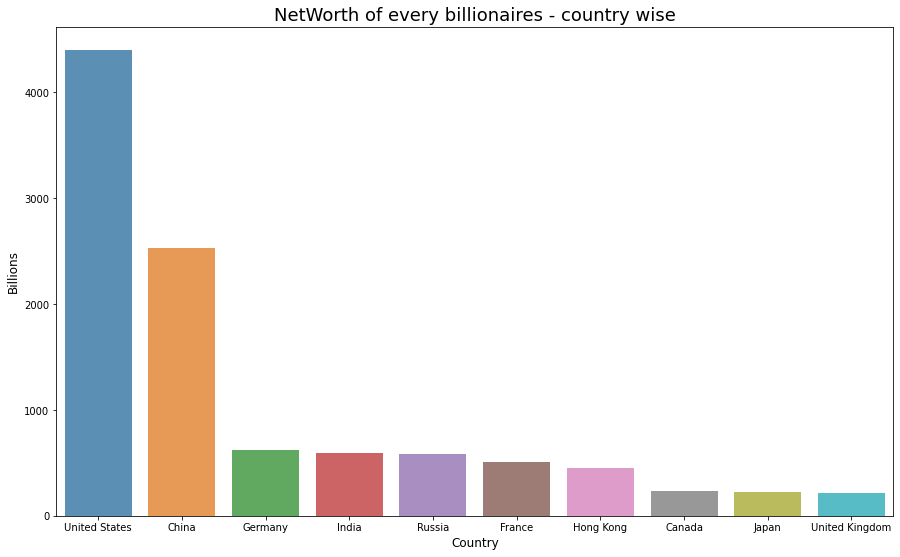

In [ ]:
contributed = df.groupby('Country')['NetWorth'].sum().sort_values(ascending = False).head(10)
plt.figure(figsize=(15,9))
sns.barplot(contributed.index, contributed.values, alpha=0.8)
plt.title('NetWorth of every billionaires - country wise', fontsize=18)
plt.ylabel('Billions', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

## 10. Which city contains more billionaires?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


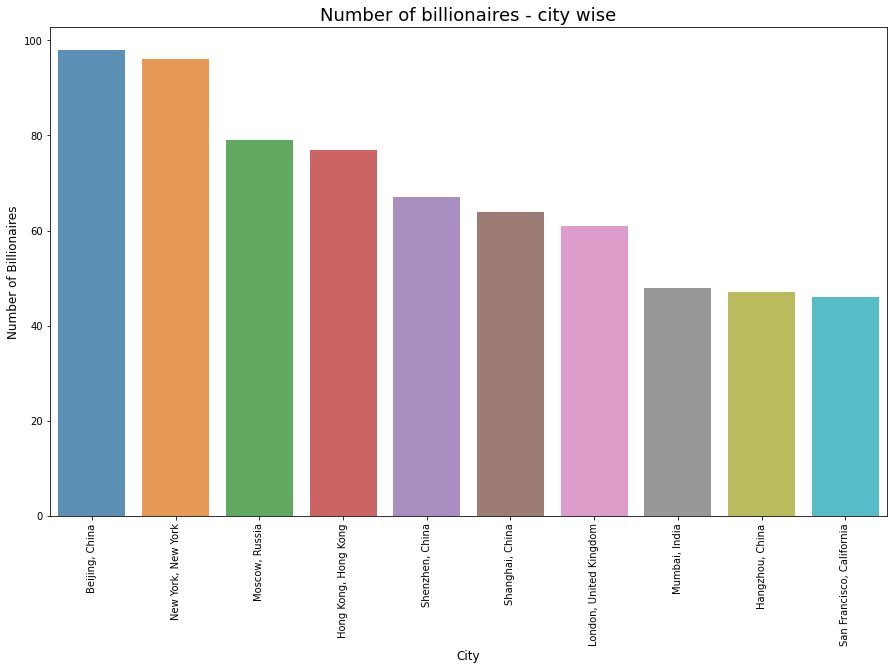

In [ ]:
city = df['Residence'].value_counts().head(10)
plt.figure(figsize=(15,9))
sns.barplot(city.index, city.values, alpha=0.8)
plt.title('Number of billionaires - city wise', fontsize=18)
plt.ylabel('Number of Billionaires', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## 12. How many billionaire families are there?

In [ ]:
family = 0
for i in df['Name']:
  j = i.split()
  if j[-1] == 'family':
    family += 1
print('Number of billionaire families: ', family)

Number of billionaire families:  335
